In [126]:
import os

path = r"C:\Users\e02324\Downloads\workspace\financeABM_tanaka-san\result"

dirs = get_dirs(path)
out_list = []

for dir in dirs:
    f = open(dir+'Bankrupt.txt', 'r')
    lines = open(dir+'Bankrupt.txt').read().split('\n')
    lines.pop(0)
    for line in lines:
        line_list = line.split('\t')
        if line_list[0] == '-' or line_list[0] == '':
            break
        line_list.insert(0,dir.split('\\')[-2])
        line_list.insert(0,dir.split('\\')[-3])
        out_list.append(line_list)
        

f = open('list.txt', 'w')
for x in out_list:
    f.write(str(x).split('[')[1].split(']')[0].replace('\'','').replace(' ','') + "\n")
f.close()



In [128]:
import numpy as np
import mysql.connector

connector = mysql.connector.connect(host='localhost',db='financial crisis model',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "TRUNCATE `bankrupt`"
cursor.execute(sql)

sql = "LOAD DATA LOCAL INFILE 'C:\\\\Users\\\\e02324\\\\Documents\\\\agent-log-analysis\\\\Financial crisis model\\\\list.txt' REPLACE INTO TABLE `financial crisis model`.`bankrupt` CHARACTER SET cp932 FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED BY '\"' LINES TERMINATED BY \'\r\n\' (`param`, `run`, `step`, `agent`, `reason`, `finloop`, `EEloop`, `gap`, `car`, `EE`, `collectable`, `other1`, `other2`)"
cursor.execute(sql)

connector.commit()
cursor.close()
connector.close()

In [78]:
import os

#path以下２階層すべてのディレクトリを返す
def get_dirs(path):
    rt = []
    params = os.listdir(path)
    params = [f for f in params if os.path.isdir(os.path.join(path, f))]

    for param in params:
        runs = os.listdir(path+"\\"+param)
        runs = [f for f in runs if os.path.isdir(os.path.join(path+"\\"+param, f))]
        for run in runs:
            rt.append(path+"\\"+param+"\\"+run+"\\") 
    
    return rt

In [129]:
import numpy as np
import mysql.connector

connector = mysql.connector.connect(host='localhost',db='financial crisis model',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql00 = "select step from bankrupt where agent = 0 and param = 'AS000CA100'"
sql01 = "select step from bankrupt where agent = 0 and param = 'AS010CA090'"
sql02 = "select step from bankrupt where agent = 0 and param = 'AS020CA080'"
sql03 = "select step from bankrupt where agent = 0 and param = 'AS030CA070'"
sql04 = "select step from bankrupt where agent = 0 and param = 'AS040CA060'"
sql05 = "select step from bankrupt where agent = 0 and param = 'AS050CA050'"
sql06 = "select step from bankrupt where agent = 0 and param = 'AS060CA040'"
sql07 = "select step from bankrupt where agent = 0 and param = 'AS070CA030'"
sql08 = "select step from bankrupt where agent = 0 and param = 'AS080CA020'"
sql09 = "select step from bankrupt where agent = 0 and param = 'AS090CA010'"
sql10 = "select step from bankrupt where agent = 0 and param = 'AS100CA000'"



cursor.execute(sql00)
data00 = np.array(cursor.fetchall())
cursor.execute(sql01)
data01 = np.array(cursor.fetchall())
cursor.execute(sql02)
data02 = np.array(cursor.fetchall())
cursor.execute(sql03)
data03 = np.array(cursor.fetchall())
cursor.execute(sql04)
data04 = np.array(cursor.fetchall())
cursor.execute(sql05)
data05 = np.array(cursor.fetchall())
cursor.execute(sql06)
data06 = np.array(cursor.fetchall())
cursor.execute(sql07)
data07 = np.array(cursor.fetchall())
cursor.execute(sql08)
data08 = np.array(cursor.fetchall())
cursor.execute(sql09)
data09 = np.array(cursor.fetchall())
cursor.execute(sql10)
data10 = np.array(cursor.fetchall())


cursor.close()
connector.close()



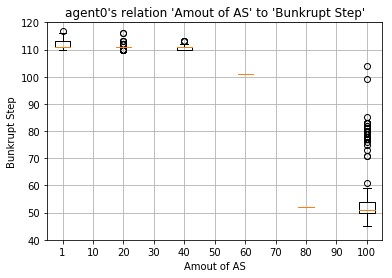

agent0のbunkrupt回数


(49, 0, 50, 0, 50, 0, 50, 0, 50, 0, 1000)

In [130]:
#coding:utf-8
import matplotlib.pyplot as plt

hige = (flatten(data00),flatten(data01), flatten(data02),flatten(data03),flatten(data04),flatten(data05),flatten(data06),flatten(data07),flatten(data08),flatten(data09),flatten(data10))

fig = plt.figure()
ax = fig.add_subplot(111)

# 箱ひげ図をつくる
bp = ax.boxplot(hige)
ax.set_xticklabels(['1', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])

plt.title('agent0\'s relation \'Amout of AS\' to \'Bunkrupt Step\'')
plt.grid()
plt.xlabel('Amout of AS')
plt.ylabel('Bunkrupt Step')
plt.ylim([40,120])
plt.show()

print('agent0のbunkrupt回数')
len(flatten(data00)),len(flatten(data01)),len(flatten(data02)),len(flatten(data03)),len(flatten(data04)),len(flatten(data05)),len(flatten(data06)),len(flatten(data07)),len(flatten(data08)),len(flatten(data09)),len(flatten(data10))


In [81]:
def flatten(nested_list):
    """2重のリストをフラットにする関数"""
    return [e for inner_list in nested_list for e in inner_list]

In [134]:
import math

def translate(log):
    log = sorted(log, key=lambda li: li[4][1])
    log = sorted(log, key=lambda li: li[2])
    
    
    pre_step = 0
    st = ''
    for event in log:
        
        if int(event[2]) != pre_step:
#            st = st+'I'*math.ceil((int(event[2])-pre_step)/20)
            dif = int(event[2]) - pre_step
            if dif <=5:
                st = st+'I'
#            elif dif <=10:
#                st = st+'J'
            else:
                st = st+'k'
#            st = st+'I'
            pre_step = int(event[2])

        if event[4][0] == '1' and event[3] == '0':
            st = st+'A'
        elif event[4][0] == '2' and event[3] == '0':
            st = st+'A'
        elif event[4][0] == '3' and event[3] == '0':
            st = st+'A'
        elif event[4][0] == '4' and event[3] == '0':
            st = st+'A'
        elif event[4][0] == '1' and event[3] != '0':
            st = st+'E'
        elif event[4][0] == '2' and event[3] != '0':
            st = st+'E'
        elif event[4][0] == '3' and event[3] != '0':
            st = st+'E'
        elif event[4][0] == '4' and event[3] != '0':
            st = st+'E'
            
    return [log[0][0],log[0][1],st]

In [141]:
#ログの書き換え

import numpy as np
import mysql.connector

connector = mysql.connector.connect(host='localhost',db='financial crisis model',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "select * from bankrupt"


cursor.execute(sql)
data = np.array(cursor.fetchall())



cursor.close()
connector.close()


out_list =[]

for i in range(0,105,5):
    param = 'AS'+"{0:0>3}".format(i)+'CA'+"{0:0>3}".format(100-i)
    print(param)
    for j in range(100):
        log = [x for x in data if x[0]==param and int(x[1])==j] 
        if len(log)!=0:
            out_list.append(translate(log))
           
            
f = open('translate.txt', 'w')
for x in out_list:
    f.write(str(x).split('[')[1].split(']')[0].replace('\'','') + "\n")
f.close()

AS000CA100
AS005CA095
AS010CA090
AS015CA085
AS020CA080
AS025CA075
AS030CA070
AS035CA065
AS040CA060
AS045CA055
AS050CA050
AS055CA045
AS060CA040
AS065CA035
AS070CA030
AS075CA025
AS080CA020
AS085CA015
AS090CA010
AS095CA005
AS100CA000


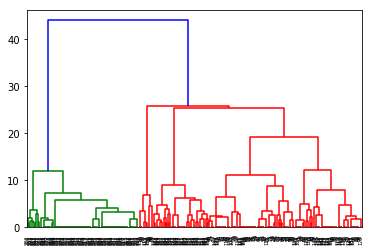

In [108]:
#プロセスから結果の分類
import numpy as np
import mysql.connector
import Levenshtein
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from matplotlib.pyplot import show
import matplotlib.pyplot as plt

#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='financial crisis model',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "select log from logs"

cursor.execute(sql)
data = np.array(cursor.fetchall())

sql_base = "select * from logs"

cursor.execute(sql_base)
data_base = np.array(cursor.fetchall())

cursor.close()
connector.close()


#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
#result1 = linkage(data, method='ward')
#dendrogram(result1)
#show()

#dArray1 = distance.pdist(data, metric = 'Levenshtein')
#result2 = linkage(dArray1, method = 'average')

n=len(data)
dMatrix = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        dMatrix[i, j] = Levenshtein.distance(data[i][0], data[j][0])


#距離ベクトル生成
dArray = distance.squareform(dMatrix)
 
#クラスタリング
result = linkage(dArray, method = 'ward')
 
#図示
dendrogram(result)
show()

In [109]:
joint =  np.concatenate((data_base, cut_tree(result, 4)), axis=1)
print(joint)

f = open('output.txt', 'w')
for x in joint:
    f.write(str(x).split('[')[1].split(']')[0].replace('\'','') + "\n")
f.close()

[['AS000CA100' '0' 'kEEAEIE' '0']
 ['AS000CA100' '1' 'kEEEAE' '0']
 ['AS000CA100' '2' 'kEIEEAEEIE' '0']
 ..., 
 ['AS100CA000' '47' 'kEIEIEIAkE' '3']
 ['AS100CA000' '48' 'kEIEIEIAkE' '3']
 ['AS100CA000' '49' 'kEIEEIAkE' '3']]


In [110]:
#中心を抽出

n = 4
join =  np.concatenate((dMatrix, cut_tree(result, n)), axis=1)

cut = flatten(cut_tree(result, n))
li = []

for i in range(n):
    li.append(list(map(lambda a:a==i, cut)))


max_log = np.zeros(n)

for j in range(len(dMatrix)):
    
    tmp = np.array(dMatrix[j] * li[cut[j]])
    ave = sum(tmp) / sum(li[cut[j]])
    print(str(j)+'\t'+str(ave) +'\t'+ str(cut[j]))
    
    

0	2.45255474453	0
1	2.66423357664	0
2	3.39416058394	0
3	2.45255474453	0
4	2.22627737226	0
5	2.45255474453	0
6	2.33576642336	0
7	2.07299270073	0
8	2.66423357664	0
9	2.33576642336	0
10	3.59124087591	0
11	2.66423357664	0
12	4.02189781022	0
13	2.89051094891	0
14	4.0802919708	0
15	2.33576642336	0
16	2.46153846154	1
17	2.07299270073	0
18	2.3503649635	0
19	2.08759124088	0
20	2.45255474453	0
21	2.22627737226	0
22	2.37226277372	0
23	2.00729927007	0
24	2.07299270073	0
25	2.83941605839	0
26	2.08759124088	0
27	2.00729927007	0
28	2.08759124088	0
29	2.37226277372	0
30	2.55474452555	0
31	2.33576642336	0
32	2.45255474453	0
33	3.29197080292	0
34	2.00729927007	0
35	3.43795620438	0
36	2.45255474453	0
37	2.35766423358	0
38	2.33576642336	0
39	2.79562043796	0
40	2.45255474453	0
41	2.21897810219	0
42	2.45255474453	0
43	2.68613138686	0
44	2.07299270073	0
45	2.86131386861	0
46	2.70802919708	0
47	2.89051094891	0
48	2.69230769231	1
49	2.64233576642	0
50	2.45255474453	0
51	2.33576642336	0
52	2.08759124088	0
53	2.

single


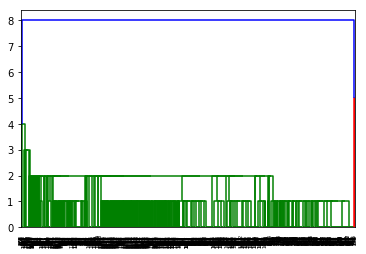

complete


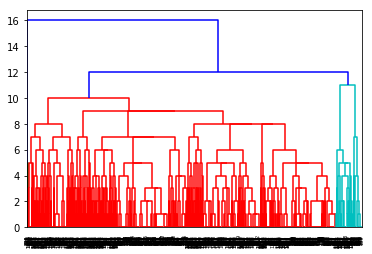

average


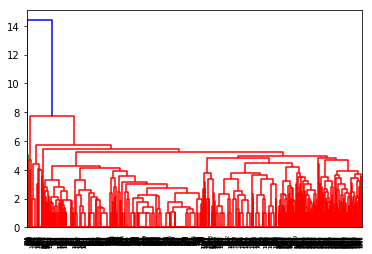

weighted


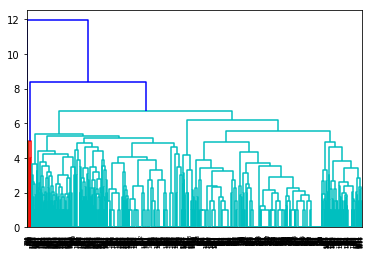

centroid


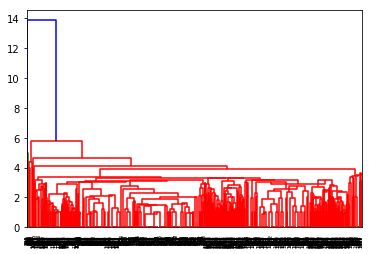

median


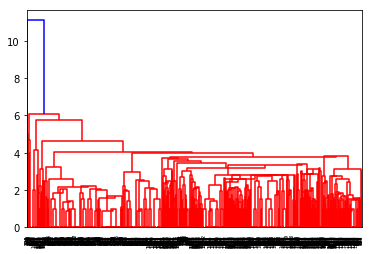

ward


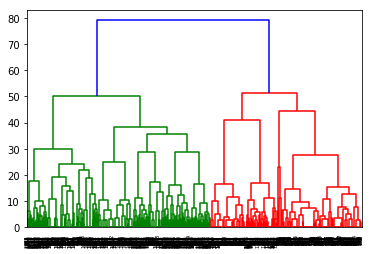

In [114]:

how = 'single'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()

how = 'complete'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()

how = 'average'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()

how = 'weighted'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()

how = 'centroid'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()

how = 'median'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()

how = 'ward'
print(how)
result = linkage(dArray, method = how) 
dendrogram(result)
show()